<a href="https://colab.research.google.com/github/Rneron/Python/blob/main/ModeloRBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Este programa tem como objetivo estimar do número de PageViews nos dias 12 e 13 de Setembro, para isso utilizei modelos de suavização exponencial sendo eles: Algoritmo de suavização Simples,Holt-Winters (aditivo e multiplicativo) e Pegels (aditivo e multiplicativo).

### Os texto em itálico PageViews utilizado para a construção dos modelos foram retirados da fonte de dados "Analytics_GZH_GA4_PRD" e o período utilizado foi 16/07/2023 até 06/09/2023

**IMPORTANDO BIBLIOTECAS**

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

from sklearn.metrics import mean_absolute_error,mean_squared_error



**IMPORTANDO OS DADOS**

In [285]:
dados = pd.read_csv('/content/drive/MyDrive/Python/tabelas/Dados.xlsx - Planilha1 (2).csv',encoding='iso-8859-1',header=None,names=["Data","PageViews"])

**BREVE ANÁLISE DOS DADOS**

In [286]:
dados.head(10)

,Data,PageViews
0,1\01\2023,824605
1,2\01\2023,1064369
2,3\01\2023,1173812
3,4\01\2023,1243996
4,5\01\2023,1039252
5,6\01\2023,1093870
6,7\01\2023,853372
7,8\01\2023,795653
8,9\01\2023,978525
9,10\01\2023,954873


**GERANDO UMA COLUNA DE DATAS**

In [287]:
data_inicial = '01-01-2023'
data_final = '06-09-2023'
datas = []

# Loop para gerar as datas de dia em dia
data_atual = pd.to_datetime(data_inicial, format='%d-%m-%Y')
data_fim = pd.to_datetime(data_final, format='%d-%m-%Y')

while data_atual <= data_fim:
    datas.append(data_atual)
    data_atual += pd.DateOffset(days=1)

# DataFrame com as datas
df1 = pd.DataFrame({'data': datas})

# DataFrame resultante
print(df1)


          data
0   2023-01-01
1   2023-01-02
2   2023-01-03
3   2023-01-04
4   2023-01-05
..         ...
244 2023-09-02
245 2023-09-03
246 2023-09-04
247 2023-09-05
248 2023-09-06

[249 rows x 1 columns]


**EXCLUINDO A COLUNA Data POR NÃO ESTAR NO FORMATO DESEJADO**

In [288]:
del dados["Data"]

**JUNTANDO O DATA FRAME COM AS DATAS CRIADAS E AS PAGEVIEWS**

In [289]:
ga4 = pd.concat([df1,dados], axis=1)


**TRANSFORMANDO A COLUNA "data" PARA O FORMATO DE DATA**

In [290]:
ga4['data'] = pd.to_datetime(ga4['data'], format='%d/%m/%Y')


In [291]:
ga4 = ga4.iloc[197:]

In [292]:
ga4.isna().sum()

data         0
PageViews    0
dtype: int64

**ESCOLHENDO OS PAGEVIEWS APENAS DO GA4**

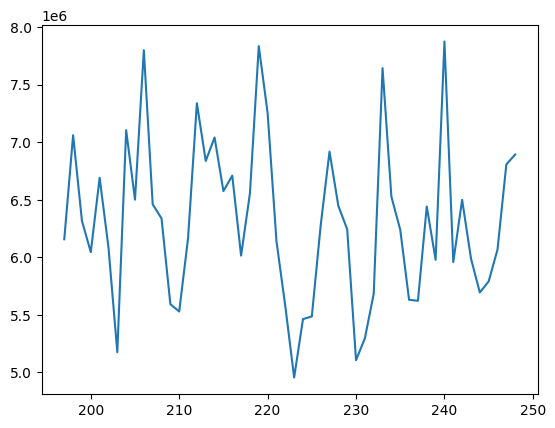

In [293]:
plt.plot(ga4.PageViews)


In [294]:
ga4.index = pd.to_datetime(ga4['data'], format='%d/%m/%Y')

**TESTE DE DICKEY-FULLER PARA VERIFICAR SE A SÉRIE É ESTACIONÁRIA**

In [295]:
adftest = adfuller(ga4.PageViews, autolag='AIC', regression='ct')
print("ADF-Estatística:", adftest[0])
print("P-Valor:", adftest[1])
print("Valores Críticos:", adftest[4])
print("Como o P-Valor é menor que 0.05 então rejeitamos a hipótese nula e concluímos que a série é estacionária")

ADF-Estatística: -5.8018528535439735
P-Valor: 5.672044096268917e-06
Valores Críticos: {'1%': -4.1565075081811145, '5%': -3.5042391045397747, '10%': -3.181642309326896}
Como o P-Valor é menor que 0.05 então rejeitamos a hipótese nula e concluímos que a série é estacionária


**A partir daqui iremos construir os modelos para a série estacionária**

**Modelo de Suavização Simples**


In [299]:
modelo = SimpleExpSmoothing(ga4.PageViews).fit()
previsao = modelo.predict(start='2023-9-07',end='2023-9-14')

**Modelo de Suavização de Holt-Winters aditivo**

In [300]:

modelo_2=ExponentialSmoothing(ga4.PageViews,seasonal='add',trend='add').fit()
previsao_2 = modelo_2.predict(start='2023-9-07',end='2023-9-14')


**Modelo de Suavização de Holt-Winters multiplicativo**

In [301]:

modelo_3 = ExponentialSmoothing(ga4.PageViews,seasonal='mul',trend='add').fit()
previsao_3 = modelo_3.predict(start='2023-9-07',end='2023-9-14')



**Modelo de Suavização Pegels aditivo**

In [302]:
modelo_4 = ExponentialSmoothing(ga4.PageViews,seasonal='add',trend='mul').fit()
previsao_4 = modelo_4.predict(start='2023-9-07',end='2023-9-14')

**Modelo de Suavização Pegels multiplicativo**

In [303]:
modelo_5 = ExponentialSmoothing(ga4.PageViews,seasonal='mul',trend='mul').fit()
previsao_5 = modelo_5.predict(start='2023-9-07',end='2023-9-14')

In [304]:

print('-Erro médio absoluto do Algoritmo de Suavização Simples :',
      round(mean_absolute_error(ga4.PageViews,modelo.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Simples :',
      round(mean_squared_error(ga4.PageViews,modelo.fittedvalues)**0.5,3))

print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Holt-Winters aditivo :',
      round(mean_absolute_error(ga4.PageViews,modelo_2.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters aditivo :',
      round(mean_squared_error(ga4.PageViews,modelo_2.fittedvalues)**0.5,3))

print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Holt-Winters multiplicativo :',
      round(mean_absolute_error(ga4.PageViews,modelo_3.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters multiplicativo :',
      round(mean_squared_error(ga4.PageViews,modelo_3.fittedvalues)**0.5,3))


print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Pegels aditivo :',
      round(mean_absolute_error(ga4.PageViews,modelo_4.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Pegels aditivo :',
      round(mean_squared_error(ga4.PageViews,modelo_4.fittedvalues)**0.5,3))

print(' '*254)
print('-Erro médio absoluto do Algoritmo de Suavização Pegels multiplicativo:',
      round(mean_absolute_error(ga4.PageViews,modelo_5.fittedvalues),3))
print('-Raiz do erro médio quadrado do Algoritmo de Suavização Pegels multiplicativo:',
      round(mean_squared_error(ga4.PageViews,modelo_5.fittedvalues)**0.5,3))

-Erro médio absoluto do Algoritmo de Suavização Simples : 565935.881
-Raiz do erro médio quadrado do Algoritmo de Suavização Simples : 716861.14
                                                                                                                                                                                                                                                              
-Erro médio absoluto do Algoritmo de Suavização Holt-Winters aditivo : 414503.984
-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters aditivo : 529928.582
                                                                                                                                                                                                                                                              
-Erro médio absoluto do Algoritmo de Suavização Holt-Winters multiplicativo : 414039.936
-Raiz do erro médio quadrado do Algoritmo de Suavização Holt-Winters multiplicativo 

**Vemos que o modelo 3 foi aquele que se saiu melhor por possuir os menores erros, dessa forma iremos usá-lo pra fazer as predições**


In [306]:
modelo_3.summary()

Dep. Variable:,PageViews,No. Observations:,52
Model:,ExponentialSmoothing,SSE,14601389089926.951
Optimized:,True,AIC,1392.766
Trend:,Additive,BIC,1414.230
Seasonal:,Multiplicative,AICC,1402.345
Seasonal Periods:,7,Date:,"Thu, 19 Oct 2023"
Box-Cox:,False,Time:,20:22:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1817857,alpha,True
smoothing_trend,0.0151488,beta,True


**AJUSTE DO MODELO**

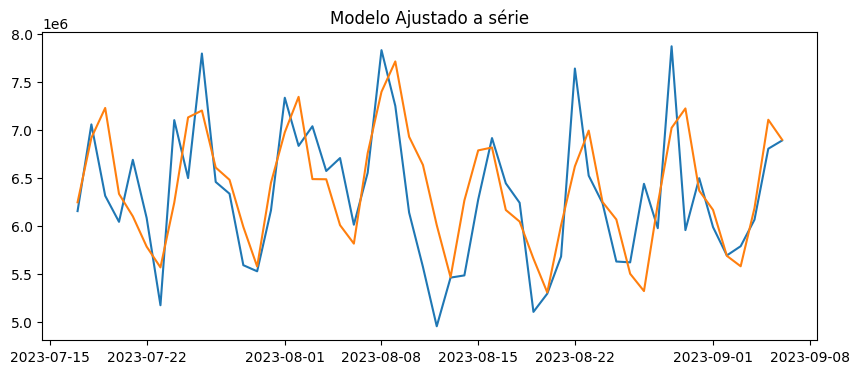

In [308]:
plt.figure(figsize=(10,4))
plt.plot(ga4.PageViews)
plt.plot(modelo_3.fittedvalues)
plt.title('Modelo Ajustado a série')

plt.show()


**PREVISÃO DOS DIAS 07 A 14**

2023-09-07    6.397363e+06
2023-09-08    6.143046e+06
2023-09-09    5.711724e+06
2023-09-10    5.620778e+06
2023-09-11    6.155411e+06
2023-09-12    7.081250e+06
2023-09-13    6.955300e+06
2023-09-14    6.450282e+06
Freq: D, dtype: float64

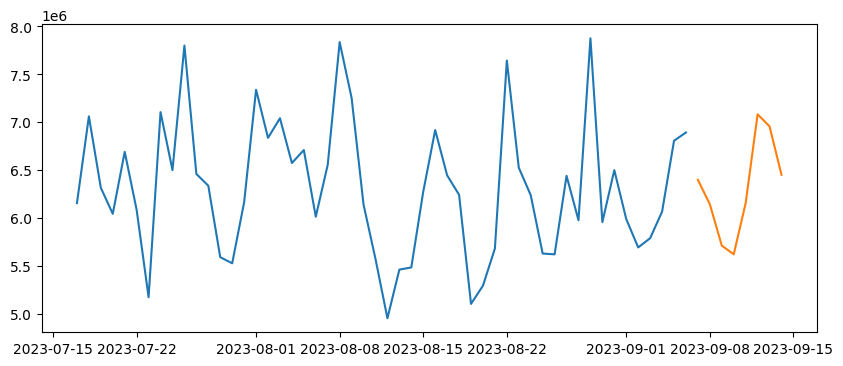

In [309]:
plt.figure(figsize=(10,4))
plt.plot(ga4.PageViews)
plt.plot(previsao_3)
previsao_3

**ANÁLISE DOS RESÍDUOS**

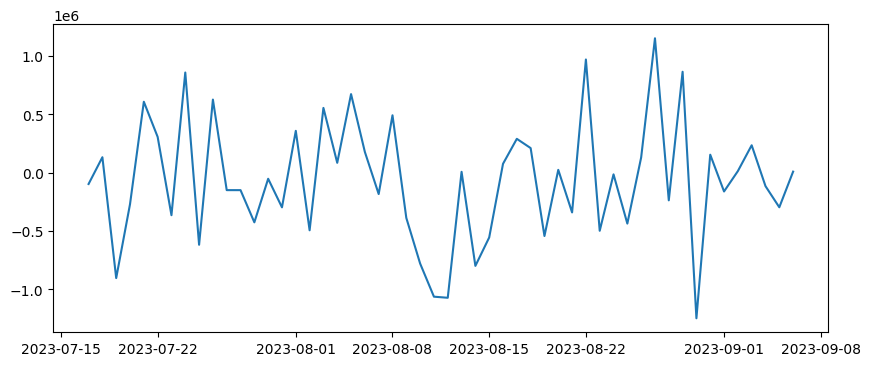

In [311]:
plt.figure(figsize=(10,4))
residuo = modelo_2.resid
plt.plot(residuo)
plt.show()

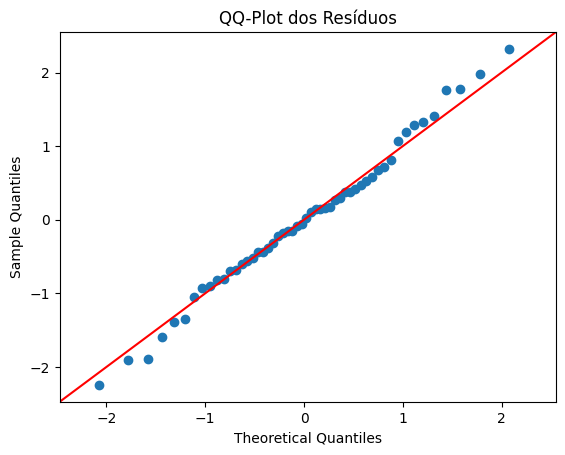

In [313]:

import statsmodels.graphics.gofplots as smg

smg.qqplot(residuo, line='45', fit=True)
plt.title('QQ-Plot dos Resíduos')
plt.show()


In [310]:
from scipy.stats import jarque_bera
print(' '*254)
test1 = jarque_bera(residuo)
print('Estatística Jarque-Bera :', test1[0])
print('P-valor :', test1[1]) # São Normais

                                                                                                                                                                                                                                                              
Estatística Jarque-Bera : 0.3995441652434172
P-valor : 0.8189173773113951
